# Deadline extended for 1st graded homework problem: 
# due next Friday, November 2011-11-22

### Files for this project:

# cp -r /home/schneigu/ph464/2011-11-15 .

# PH464 Homework project (graded) 

#### Deadline is Friday, December 6 at 2pm.

Please submit your work as jupyter notebook (or possibly multiple jupyter notebooks) via email. It is permissible to discuss your project with other students but your submitted work has to be your own. All modeling work should be accompanied by text describing and explaining the work and suitable figures.

## Predicting superconducting transition temperatures from material database.

### Background

We will use materials data for superconducting materials to create machine learning models to predict the superconducting transition temperature of superconducting materials. We will not try to predict the potential of a material to be a superconductor, as this is a question that far exceeds the scope of this class project.

Your project should use as a guide the relevant sections of the paper 
**Machine learning modeling of superconducting critical temperature**
by Stanev et al.

* published: https://www.sciencedirect.com/science/article/pii/S0927025618304877
* arXiv: https://arxiv.org/abs/1709.02727

However, to simplify data collection, we will use the dataset described in the paper
**A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor**
by Kam Hamidieh 

* arXiv https://arxiv.org/abs/1803.10260
* github https://github.com/khamidieh/predict_tc/blob/master/paper_3.pdf

The dataset is available in the github project: https://github.com/khamidieh/predict_tc
This dataset is based in part on the same sources as the Stanev paper but in its final form differs considerably in the choice of variables from the data used in the Stanev paper. Hence you should not expect identical results.


### Part 1 - Read the papers

Read the papers. You are not expected to understand everything in this papers. Reading a paper for the first time requires you to skip over details and extract the most important information for your purposes.

#### Formulate 3 questions and email to the instructor. Due date: Sunday, November 17, 5pm.

### Part 2 - Extract the dataset and read it into python data structures
The Hamidieh dataset can be downloaded as part of a github project provided by the author: https://github.com/khamidieh/predict_tc .
However the dataset is in a binary format that is not directly accessible from python. Follow the instructions in the github project to extract datafiles that can be imported into python. All software necessary software is available on the computers in Weniger 412.

To simplify this step the data is provided in clear text format in two files in the directory of todays class. What information does each file contain?

First we import the data into two `pandas.DataFrame`s.

In [13]:
import pandas as pd

#Import data
unique = pd.read_csv('superconductivity_data/unique_m.csv')
train = pd.read_csv('superconductivity_data/train.csv')

Now lets take a look at a few rows of each of the `DataFrame`s.

In [14]:
unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


So `unique` contains columns for each element, the critical temperature, and a material. The columns for the elements contain the number in the chemical formula for the material.

In [15]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


`train` contains different statistics on material properties. We know look at the shape of our two `DataFrame`s.

In [16]:
print("The shape of train is {0}.".format(train.shape))
print("The shape of unique is {0}".format(unique.shape))

The shape of train is (21263, 82).
The shape of unique is (21263, 88)


So it seems that the statistics on material proprties in a given row of `train` correspond to the material on the same row of `unique`.

### Part 3 - Visualization and exploration of the data

Explore and visualize the dataset. Answer  questions like:How many variables? How many entries? Which elements appear how often? Use the figures in the papers as a guide. At the minimum provide figures of superconducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

* $T_c<10K$. 
* Iron based superconductors, i.e. material composition contains $Fe$.
* HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly (but not exclusively) in a $1:2$ ratio indicating $Cu$-$O$ planes. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context. The $Cu$ $O$ ratio can deviate strongly from $1:2$ if oxygen is also present in other layers other than the $Cu$-$O$ planes.




There are 81 variables because each column of `train` is a variable other than the column with the critical temperatures. There are 21,263 entries. We now take a look at how often elements appear by plotting the distribution.

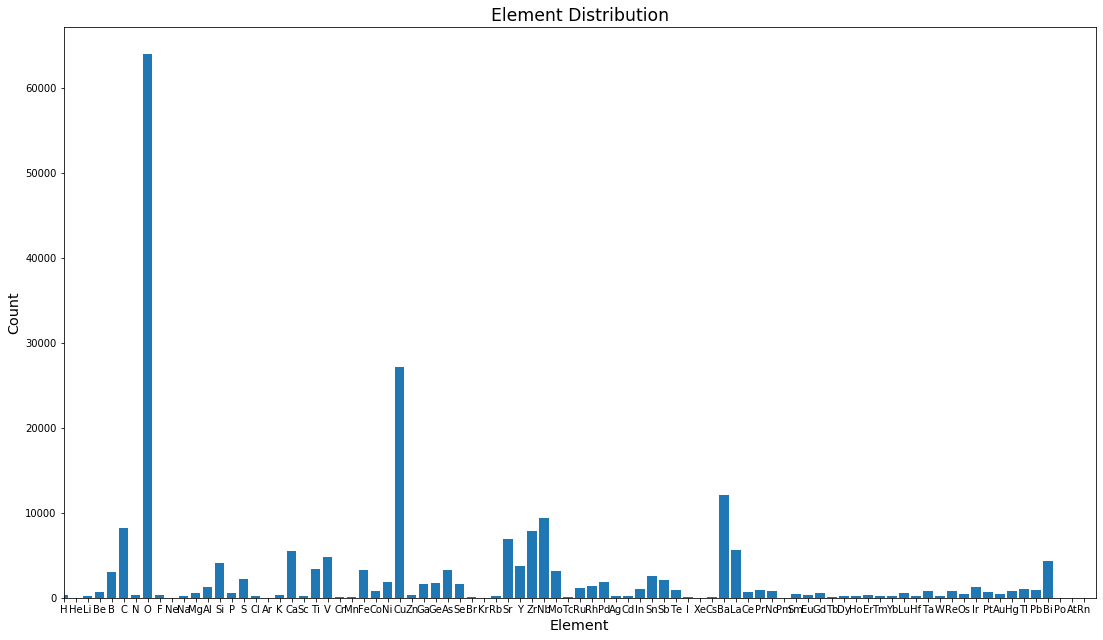

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#Make a DataFrame of the sum of the elements
ele_dst = unique.sum().iloc[:-2]

#Plot distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ele_dst.index, ele_dst.values)
ax.set_xlim([0, ele_dst.size])
ax.set_xlabel('Element', fontsize = 'x-large')
ax.set_ylabel('Count', fontsize = 'x-large')
ax.set_title('Element Distribution', fontsize = 'xx-large')
fig.set_size_inches(18.5, 10.5)

We now look at the distribution of superconducting transition temperatures for the entire dataset.

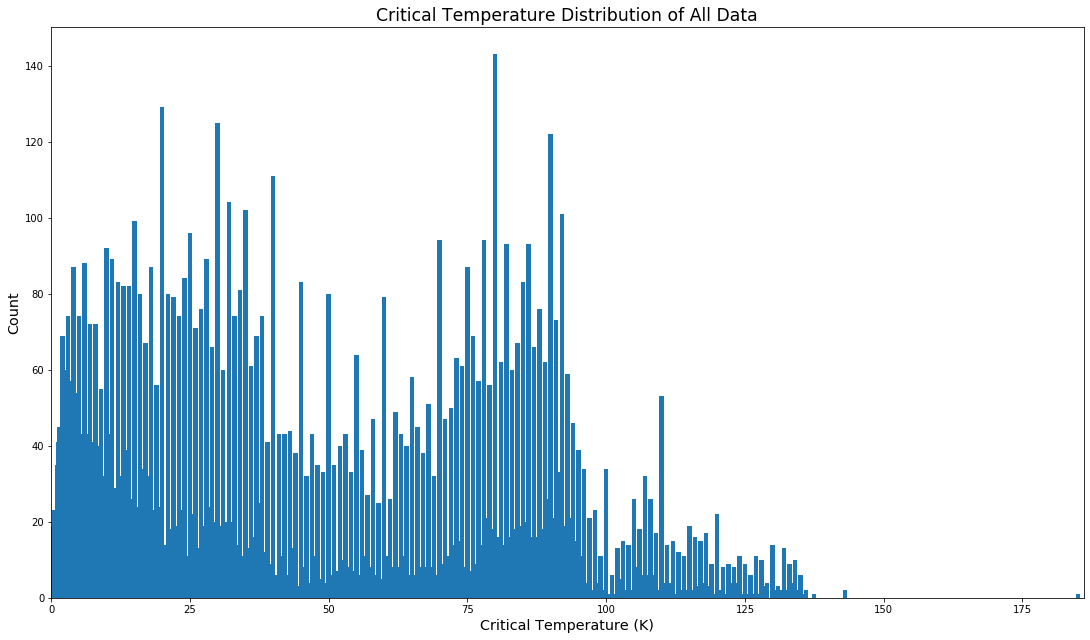

In [18]:
temps, cnts = np.unique(unique.loc[:, 'critical_temp'], return_counts = True)

#Plot distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(temps, height = cnts)
ax.set_xlim([0, np.max(temps) + 1])
ax.set_xlabel('Critical Temperature (K)', fontsize = 'x-large')
ax.set_ylabel('Count', fontsize = 'x-large')
ax.set_title('Critical Temperature Distribution of All Data', fontsize = 'xx-large')
fig.set_size_inches(18.5, 10.5)

We know look at the distribution for all data with $T_c<10K$.

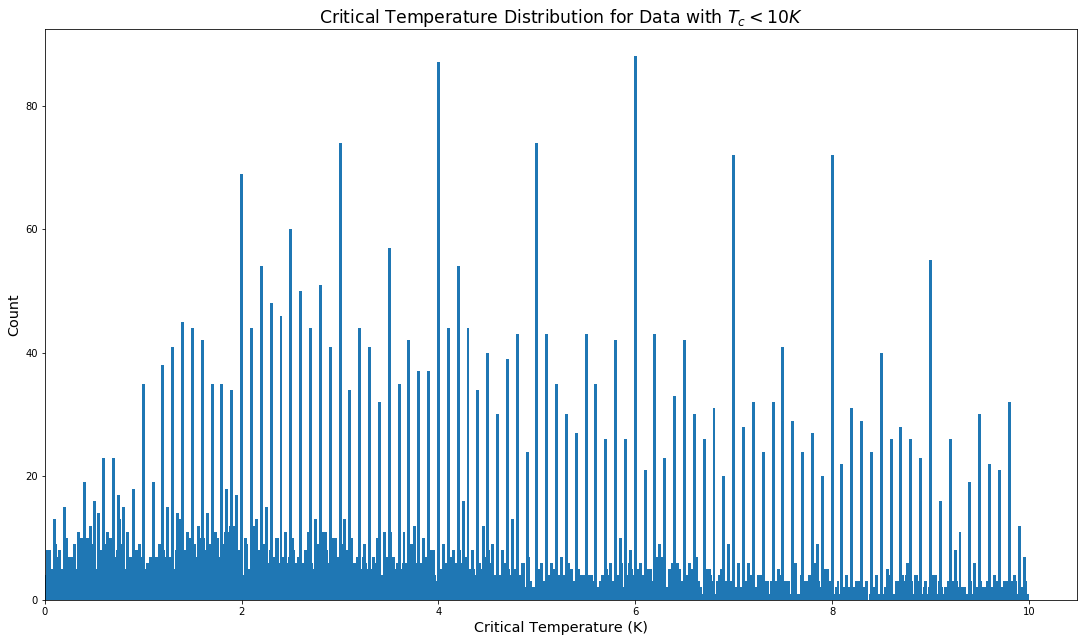

In [19]:
#Get all ciritical temperatures under 10K
all_temps = unique.loc[:, 'critical_temp'].values
ind = np.where(all_temps < 10)
temps_u10 = all_temps[ind]
temps_u10_unique, u10_cnts = np.unique(temps_u10, return_counts = True)

#Plot distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(temps_u10_unique, u10_cnts, .03)
ax.set_xlim([0, np.max(temps_u10_unique) + .5])
ax.set_xlabel('Critical Temperature (K)', fontsize = 'x-large')
ax.set_ylabel('Count', fontsize = 'x-large')
ax.set_title(r'Critical Temperature Distribution for Data with $T_c<10K$', fontsize = 'xx-large')
fig.set_size_inches(18.5, 10.5)

Here is the distribution for Iron based superconductors.

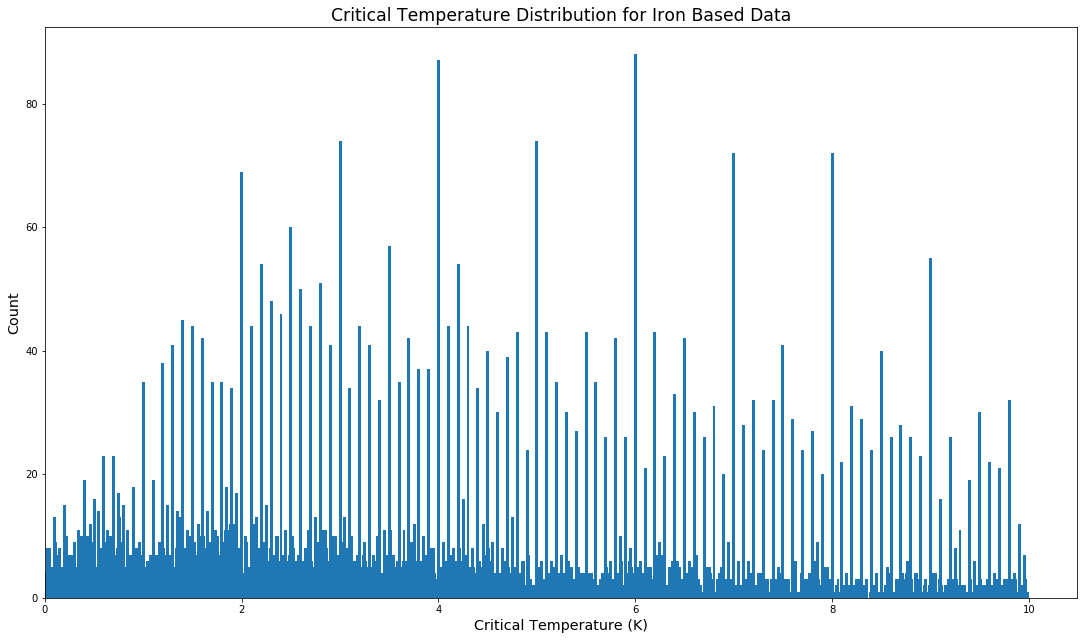

In [20]:
#Get a series of Fe composition
Fe_s = unique.loc[:, 'Fe'] 

#Get index of materials that contain Fe
Fe_ind = np.where(Fe_s > 0)

#Get the critical temperature for materials that contain Fe
Fe_temps = all_temps[Fe_ind]

#Count the temperatures
Fe_temps_unique, Fe_cnts = np.unique(Fe_temps, return_counts=True)

#Plot distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(temps_u10_unique, u10_cnts, .03)
ax.set_xlim([0, np.max(temps_u10_unique) + .5])
ax.set_xlabel('Critical Temperature (K)', fontsize = 'x-large')
ax.set_ylabel('Count', fontsize = 'x-large')
ax.set_title(r'Critical Temperature Distribution for Iron Based Data', fontsize = 'xx-large')
fig.set_size_inches(18.5, 10.5)

We look at the distribution for data of HTC superconductors. We will consider all compounds with a ratio of $Cu$ to $O$ that is between .4 and .6 inclusive to be HTC superconductors.

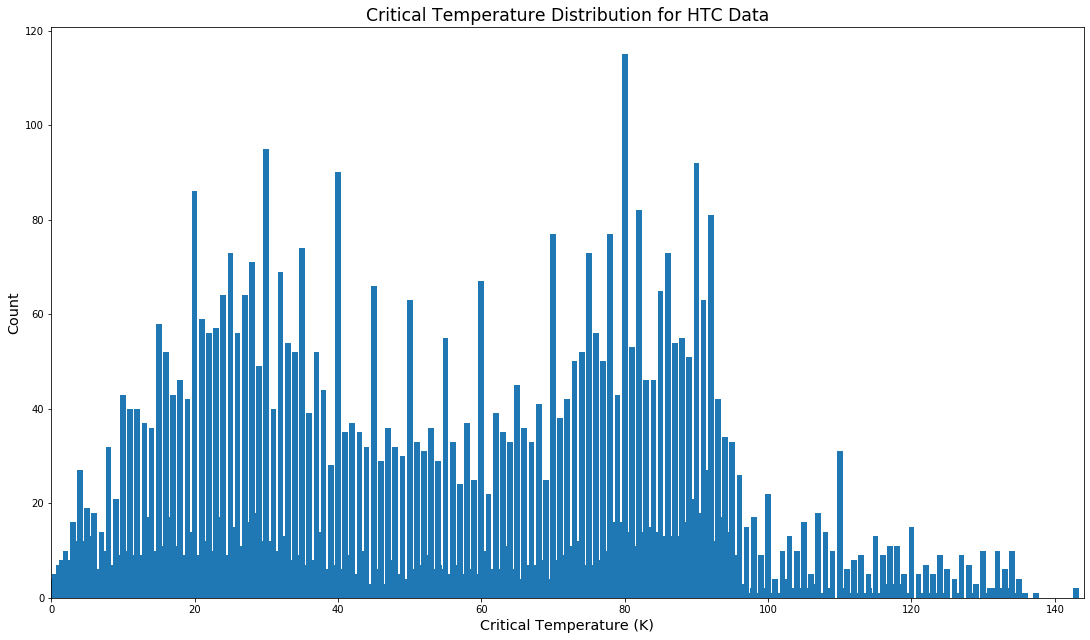

In [21]:
#Caclulate the ratio and add it as a column to unique
ratio = unique.loc[:, 'Cu'] / unique.loc[:, 'O']
unique['Cu to O ratio'] = ratio

#Find all ratios in the range and count them
HTC_ind = np.where(np.abs(ratio) - .5 <= .1)
temps_HTC = all_temps[HTC_ind]
temps_HTC_unique, HTC_cnts = np.unique(temps_HTC, return_counts = True)

#Plot distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(temps_HTC_unique, HTC_cnts)
ax.set_xlim([0, np.max(temps_HTC_unique) + 1])
ax.set_xlabel('Critical Temperature (K)', fontsize = 'x-large')
ax.set_ylabel('Count', fontsize = 'x-large')
ax.set_title(r'Critical Temperature Distribution for HTC Data', fontsize = 'xx-large')
fig.set_size_inches(18.5, 10.5)

### Part 4 - Dimensionality reduction

Apply dimensionalty reduction (for example principle component analysis (PCA)) to the dataset. What can you learn about the data? visualize your results.


We will perform PCA to reduce our data to three dimensions. We hopefully will be able to see how our data clusters from this.

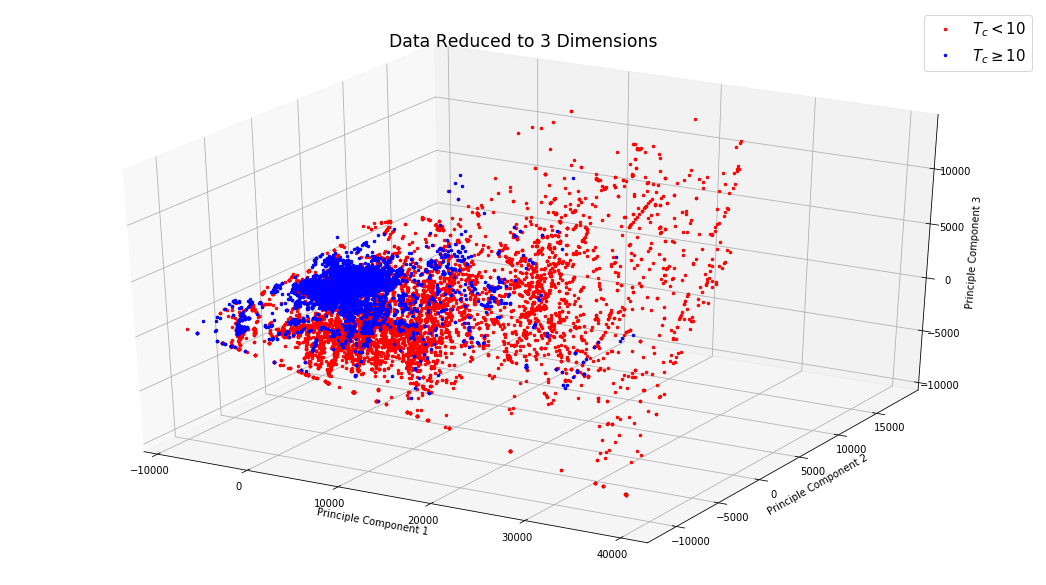

In [22]:
from sklearn.decomposition import PCA
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

#Do PCA to reduce to three dimensions
pca = PCA(n_components = 3)
pca.fit(train.iloc[:,:-1].values)
train3D = pca.transform(train.iloc[:,:-1].values)

#Store temperatures in variable
temps = train.loc[:, 'critical_temp']

#Make indexes for critical temperature above and below 10C
idx_b = np.where(temps < 10)
idx_a = np.where(temps >=10)

#Visualize the 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xb = train3D[:, 0][idx_b]
yb = train3D[:, 1][idx_b]
zb = train3D[:, 2][idx_b]
ax.plot(xb, yb, zs = zb, marker = '.', c = 'r',
        ms = 5, ls = ' ', label = r'$T_c<10$')
xa = train3D[:, 0][idx_a]
ya = train3D[:, 1][idx_a]
za = train3D[:, 2][idx_a]
ax.plot(xa, ya, zs = za, marker = '.', c = 'b',
       ms = 5, ls = ' ', label = r'$T_c\geq 10$')
ax.legend(prop={'size': 15})
ax.set_title('Data Reduced to 3 Dimensions', fontsize = 'xx-large')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
fig.set_size_inches(18.5, 10.5);

So the data with $T_c<10^\circ C$ and $T_c\geq 10^\circ C$ separate fairly well in three dimensions. At least the data with $T_c\geq 10^\circ C$ clusters together well. We now take a look at reducting to two dimensions.

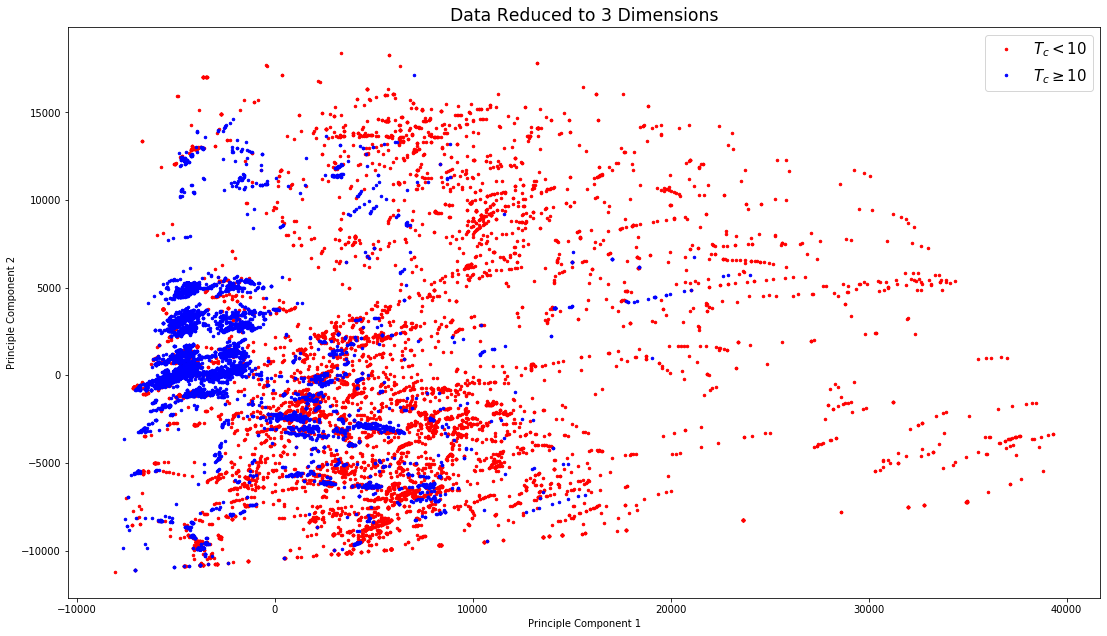

In [23]:
from sklearn.decomposition import PCA
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

#Do PCA to reduce to three dimensions
pca = PCA(n_components = 2)
pca.fit(train.iloc[:,:-1].values)
train3D = pca.transform(train.iloc[:,:-1].values)

#Store temperatures in variable
temps = train.loc[:, 'critical_temp']

#Make indexes for critical temperature above and below 10C
idx_b = np.where(temps < 10)
idx_a = np.where(temps >=10)

#Visualize the 3D data
fig = plt.figure()
ax = fig.add_subplot(111)
xb = train3D[:, 0][idx_b]
yb = train3D[:, 1][idx_b]
ax.plot(xb, yb, marker = '.', c = 'r',
        ms = 5, ls = ' ', label = r'$T_c<10$')
xa = train3D[:, 0][idx_a]
ya = train3D[:, 1][idx_a]
ax.plot(xa, ya, marker = '.', c = 'b',
       ms = 5, ls = ' ', label = r'$T_c\geq 10$')
ax.legend(prop={'size': 15})
ax.set_title('Data Reduced to 3 Dimensions', fontsize = 'xx-large')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
fig.set_size_inches(18.5, 10.5);

There is no obvious grouping exhibited in this visualization.

### Part 5 - Random Forests

Follow the example of the Stanev paper and apply Random Forest machine learning models to the data to predict the superconducting transition temperature. Use standard techniques discussed in class such as training and test data. Consider using advanced techniques such as cross-validation.

Consider both the entire dataset and the superconductor categories discussed in the Stanev paper (and listed in part 2) 
Discuss your models and use suitable graphs to document your work.

What predictions does your model make for the potential superconducting materials listed in table 6 of the Hamidieh paper? 


We start by making a function that will make a visualization of the most important features found after fitting the data using a random forest regressor.

In [74]:
#Get array of features
features = train.columns.values[:-1]

def feature_visual(gd_sr, title):
    """Makes a visualization and returns the features_importance_
    attribute of the sklearn.ensemble.RandomForestRegressor object.
    Parameters
    ----------
    gd_sr (object): object returned by
                    sklearn.model_selection.GridSearchCV where
                    the model used is
                    sklearn.ensemble.RandomForestRegressor
    title (str): the name of the dataset for the title of the visual
    """
    #Get the feature importances
    feature_importances_ = gd_sr.best_estimator_\
                           .feature_importances_
    
    #Make pandas Series of feature importances
    feat_s = pd.Series(feature_importances_, index=features)
    
    #Sort the Series
    feat_s = feat_s.sort_values()
    
    #Take only the top 6 features for visualization
    feat_s = feat_s.iloc[-6:]
    
    #Get the features
    feats = feat_s.index
    
    #Get he feature importances
    feats_import = feat_s.values
    
    #Visualize the feature importances
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(feats, feats_import)
    ax.set_title("Feature Importances for " + title + " Dataset",
                fontsize = 40)
    ax.set_xlabel("Feature", fontsize = 25)
    ax.set_ylabel("Importances", fontsize = 25)
    fig.set_size_inches(18.5, 10.5)
    
    #Return the feature importances
    return feature_importances_

#### Entire Dataset
Here, we anlayze the entire dataset. We start by splitting it into test and train data.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], train.iloc[:,-1])

Now, we apply a Random Forest machine learning model.

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from time import time

#Make the Random Forest model
rfg = RandomForestRegressor(n_jobs = -1)

#Do a grid search to find the best parameters
grid = {'n_estimators': [5, 10, 15, 20],
       'criterion': ['mse', 'mae'],
       'max_features': ['auto', None]}
gd_sr = GridSearchCV(estimator = rfg,
                    param_grid = grid,
                    scoring = 'explained_variance',
                    n_jobs = -1,
                    cv = 5,
                    iid = False)


#Time how long the grid search takes
t0 = time()
gd_sr.fit(X_train, y_train)
t = time() - t0
print('The grid search took {0} s.'.format(t))
print('The best found parameters are {0}.'.format(gd_sr.best_params_))

The grid search took 3644.434248685837 s.
The best found parameters are {'criterion': 'mse', 'max_features': None, 'n_estimators': 20}.


The best found `n_estimators` parameter is on the edge of the grid. We should increase this value and try again if we want to imporve our explained variance score.

In [52]:
from sklearn.metrics import explained_variance_score

#Get the best model from the Grid Search
y_pred = gd_sr.predict(X_test)

#Calculate the explained variance score
v = explained_variance_score(y_test, y_pred)
print("The explained variance score is {0}.".format(v))

The explained variance score is 0.9188410769863652.


The explained variance score is decent. Scores closest to 1 are best. We are now going to store `gd_sr` since it took so long to fit.

In [54]:
import pickle 

with open ("gd_sr.pkl", "wb") as fh:
    pickle.dump(gd_sr, fh)

Now we look at which features were the most important for the fit. We could tune our fit by re-fitting using only the most prominent features. However, we will not do this because of how long the fitting takes.

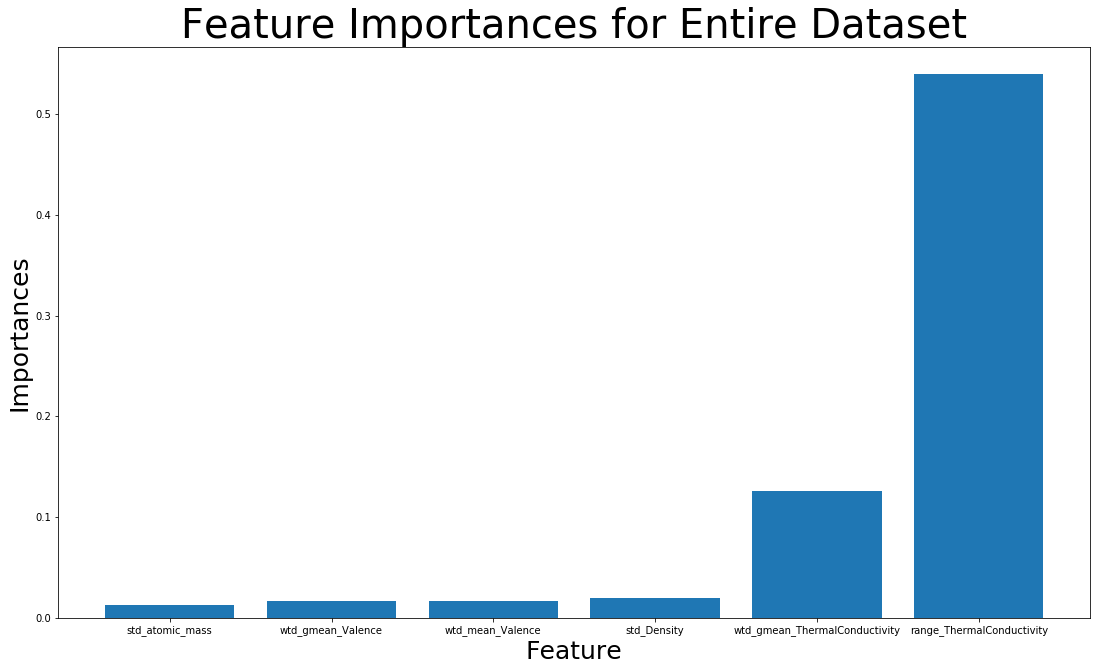

In [77]:
feature_visual(gd_sr, "Entire");

#### Iron Based Dataset
We now analyze just the Iron based data. We start by splitting into test and train data.

In [60]:
#Get the Iron based data
Fe_train = train.iloc[Fe_ind]

#Split the data
X_train_Fe, X_test_Fe, y_train_Fe, y_test_Fe = train_test_split(Fe_train.iloc[:,:-1],
                                                               Fe_train.iloc[:,-1])

Now, we apply a Random Forest machine learning model.

In [25]:
#Make the Random Forest model
rfg_Fe = RandomForestRegressor(n_jobs = -1)

grid = {'n_estimators': [23, 24, 25, 26],
       'criterion': ['mse', 'mae'],
       'max_features': ['auto', None]}
#Do a grid search to find the best parameters
gd_sr_Fe = GridSearchCV(estimator = rfg_Fe,
                    param_grid = grid,
                    scoring = 'explained_variance',
                    n_jobs = -1,
                    cv = 5,
                    iid = False)


#Time how long the grid search takes
t0 = time()
gd_sr_Fe.fit(X_train_Fe, y_train_Fe)
t_Fe = time() - t0
print('The grid search took {0} s.'.format(t_Fe))
print('The best found parameters are {0}.'.format(gd_sr_Fe.best_params_))

The grid search took 1185.2750053405762 s.
The best found parameters are {'criterion': 'mae', 'max_features': None, 'n_estimators': 26}.


The best `n_estimators` parameter found by the grid search is on the edge of the grid. We should run the grid search again with larger choices for `n_estimators`, but we will not because it takes the grid search so long to run. Instead we will proceed by evaluting the performance of the best model from the grid search and storing the grid search object.

In [26]:
#Get the best model from the Grid Search
y_pred_Fe = gd_sr_Fe.predict(X_test_Fe)

#Calculate the explained variance score
v_Fe = explained_variance_score(y_test_Fe, y_pred_Fe)
print("The explained variance score is {0}.".format(v_Fe))

#store grid search object
with open ("gd_sr_Fe.pkl", "wb") as fh:
    pickle.dump(gd_sr_Fe, fh)

The explained variance score is 0.6348567380738293.


We got a worse explained variance score with this subset of data than with the entire dataset. We could probably improve this by increasing `n_estimators` for the reasons previously discussed. It appears that smaller training sets lead to worse predictions.

Now we look at which features were the most important for the fit. We could tune our fit by re-fitting using only the most prominent features. However, we will not do this because of how long the fitting takes.

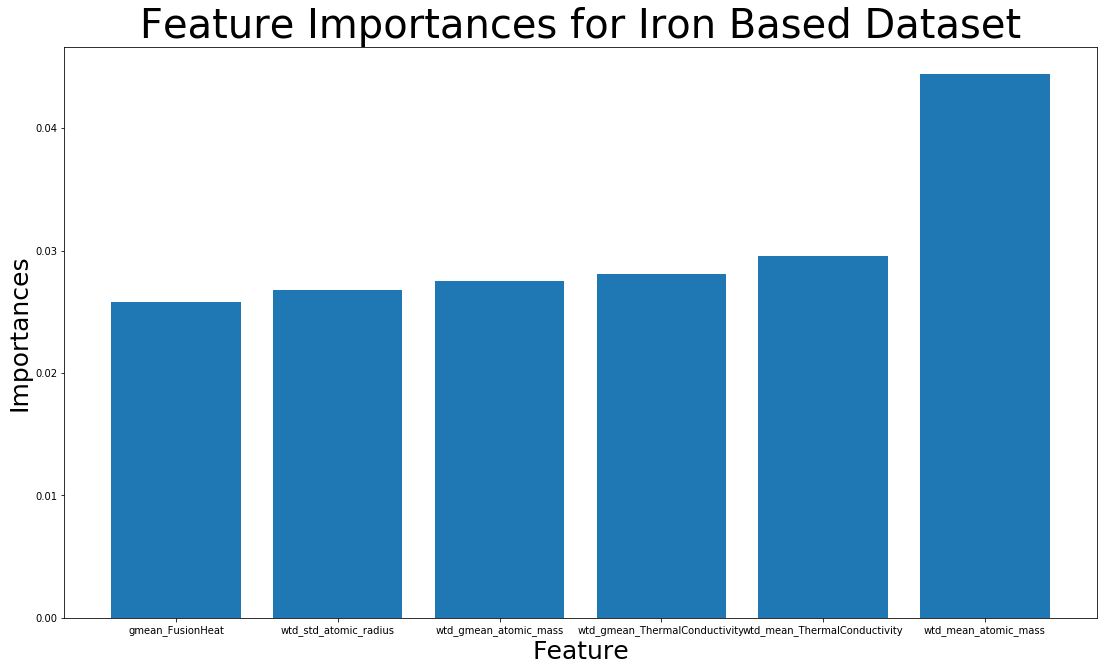

In [80]:
feature_visual(gd_sr_Fe, "Iron Based");

It appears many parameters share equal chunks of significance in fitting of the iron based data.

#### Dataset with $T_C < 10K$
Here me analyze the data with $T_c < 10K$.

In [27]:
#Get the low Tc data
Tc_train = train.iloc[ind]

#Split the data
X_train_Tc, X_test_Tc, y_train_Tc, y_test_Tc = train_test_split(Tc_train.iloc[:,:-1],
                                                               Tc_train.iloc[:,-1])

Now, we apply a Random Forest machine learning model.

In [29]:
#Make the Random Forest model
rfg_Tc = RandomForestRegressor(n_jobs = -1)

grid = {'n_estimators': [20, 25, 30, 35],
       'criterion': ['mse', 'mae'],
       'max_features': ['auto', None]}
#Do a grid search to find the best parameters
gd_sr_Tc = GridSearchCV(estimator = rfg_Tc,
                    param_grid = grid,
                    scoring = 'explained_variance',
                    n_jobs = -1,
                    cv = 5,
                    iid = False)


#Time how long the grid search takes
t0 = time()
gd_sr_Tc.fit(X_train_Tc, y_train_Tc)
t_Tc = time() - t0
print('The grid search took {0} s.'.format(t_Tc))
print('The best found parameters are {0}.'.format(gd_sr_Tc.best_params_))

The grid search took 1222.589768409729 s.
The best found parameters are {'criterion': 'mse', 'max_features': None, 'n_estimators': 35}.


The best `n_estimators` parameter found by the grid search is on the edge of the grid. We should run the grid search again with larger choices for `n_estimators`, but we will not because it takes the grid search so long to run. Instead we will proceed by evaluting the performance of the best model from the grid search and storing the grid search object.

In [30]:
#Get the best model from the Grid Search
y_pred_Tc = gd_sr_Tc.predict(X_test_Tc)

#Calculate the explained variance score
v_Tc = explained_variance_score(y_test_Tc, y_pred_Tc)
print("The explained variance score is {0}.".format(v_Tc))

#store grid search object
with open ("gd_sr_Tc.pkl", "wb") as fh:
    pickle.dump(gd_sr_Tc, fh)

The explained variance score is 0.6827872997268165.


This explained variance score is better than the one for the iron based superconductors, but worse than for the entire dataset. It still seems that more data leads to a better explained variance score.

Now we look at which features were the most important for the fit. We could tune our fit by re-fitting using only the most prominent features. However, we will not do this because of how long the fitting takes.

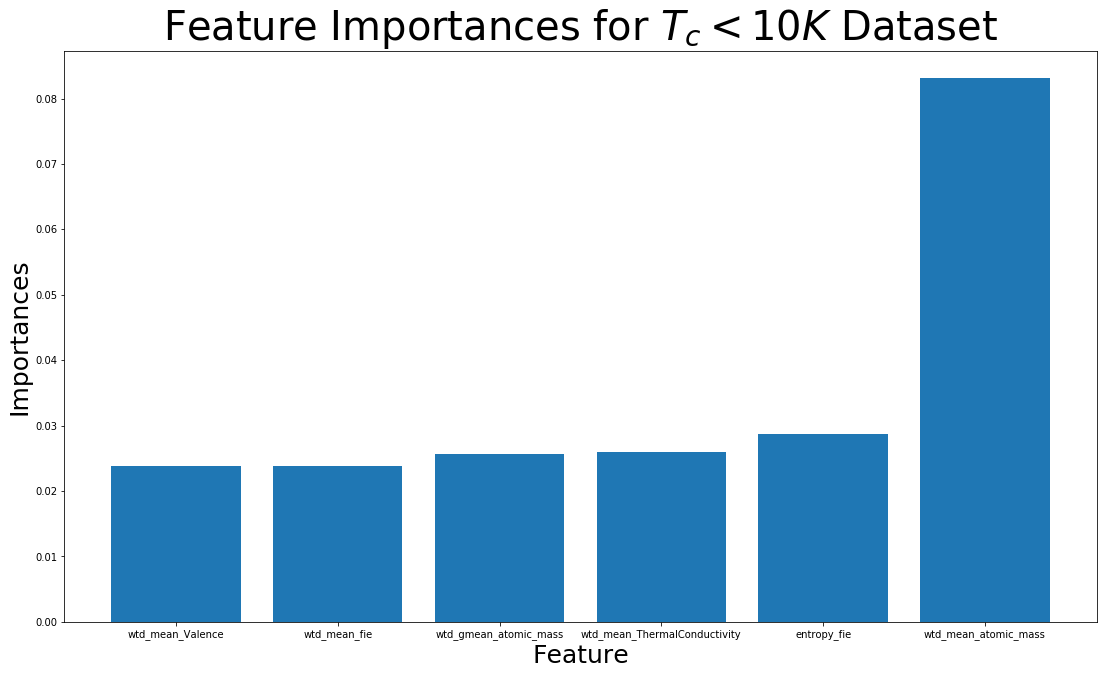

In [84]:
feature_visual(gd_sr_Tc, r'$T_c < 10 K$');

It appears that many parameters are significant in the fitting on this data as well. However, `wtd_mean_atomic_mass` is by far the most significant parameter.

#### HTC Dataset
We investigate the data for HTC superconductors. We start by splitting into test and training data.

In [32]:
#Get the HTC data
HTC_train = train.iloc[HTC_ind]

#Split the data
X_train_HTC, X_test_HTC, y_train_HTC, y_test_HTC = train_test_split(HTC_train.iloc[:,:-1],
                                                               HTC_train.iloc[:,-1])

Now, we apply a Random Forest machine learning model.

In [35]:
#Make the Random Forest model
HTC_rfg = RandomForestRegressor(n_jobs = -1)

#Do a grid search to find the best parameters
grid = {'n_estimators': [5, 10, 15, 20],
       'criterion': ['mse', 'mae'],
       'max_features': ['auto', None]}
gd_sr_HTC = GridSearchCV(estimator = HTC_rfg,
                    param_grid = grid,
                    scoring = 'explained_variance',
                    n_jobs = -1,
                    cv = 5,
                    iid = False)


#Time how long the grid search takes
t0 = time()
gd_sr_HTC.fit(X_train_HTC, y_train_HTC)
t_HTC = time() - t0
print('The grid search took {0} s.'.format(t_HTC))
print('The best found parameters are {0}.'.format(gd_sr_HTC.best_params_))

The grid search took 809.6413064002991 s.
The best found parameters are {'criterion': 'mse', 'max_features': None, 'n_estimators': 20}.


The best `n_estimators` parameter found by the grid search is on the edge of the grid. We should run the grid search again with larger choices for `n_estimators`, but we will not because it takes the grid search so long to run. Instead we will proceed by evaluting the performance of the best model from the grid search and storing the grid search object.

In [37]:
#Get the best model from the Grid Search
y_pred_HTC = gd_sr_HTC.predict(X_test_HTC)

#Calculate the explained variance score
v_HTC = explained_variance_score(y_test_HTC, y_pred_HTC)
print("The explained variance score is {0}.".format(v_HTC))

#store grid search object
with open ("gd_sr_HTC.pkl", "wb") as fh:
    pickle.dump(gd_sr_HTC, fh)

The explained variance score is 0.8698856343961268.


This is the best explained variance score for a subset of the entire dataset obtained so far! Again, this could likely be imporved by increasing `n_estimators`.

Now we look at which features were the most important for the fit. We could tune our fit by re-fitting using only the most prominent features. However, we will not do this because of how long the fitting takes.

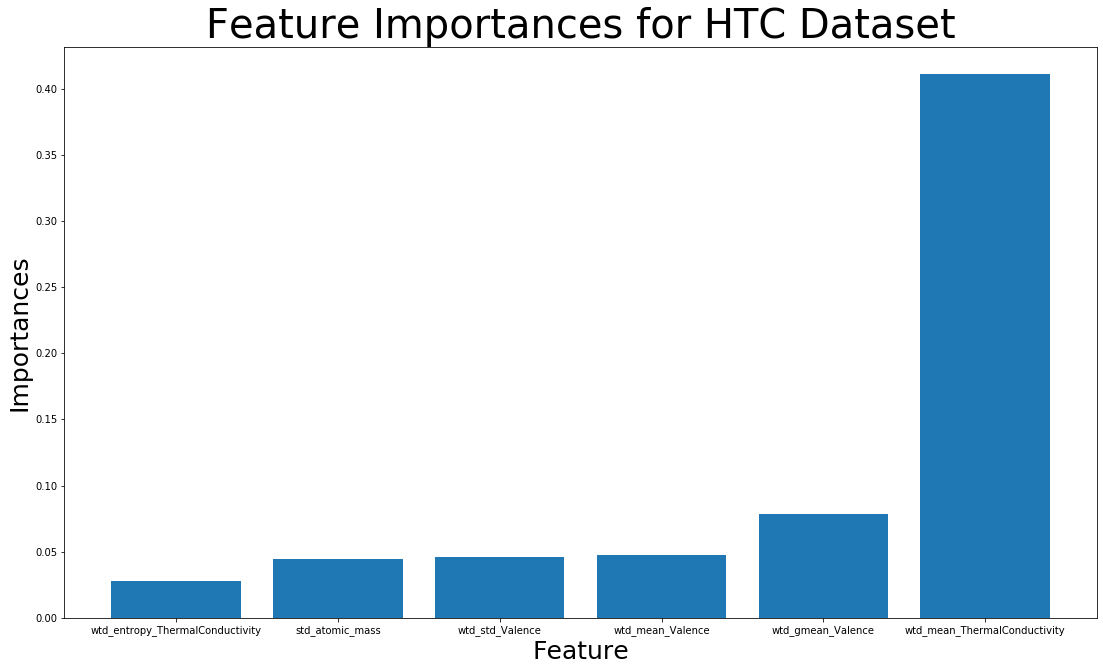

In [86]:
feature_visual(gd_sr_HTC, 'HTC');

`wtd_mean_ThermalConductivity` is by far the most important parameter here. The HTC dataset is more like the entire datset where there are a couple key parameters that share the majority of the importance. 

#### Predictions for Materials from Hamidieh
We now make a new model to make predictions solely based on the chemical formula. We will then use this model to predict the critical temperatures for the materials listed in table 6 of the Hamidieh paper.

In [160]:
#Get all chemical formula data to use for training
cf_data = unique.iloc[:, :-3]
cf_targets = unique.iloc[:, -3]

#Make the Random Forest Model
cf_rfg = RandomForestRegressor(n_jobs=-1)

#Do a grid search to find the best parameters
grid = {'n_estimators': [10, 15, 20, 25],
       'criterion': ['mse', 'mae'],
       'max_features': ['auto', None]}
gd_sr_cf = GridSearchCV(estimator = cf_rfg,
                    param_grid = grid,
                    scoring = 'explained_variance',
                    n_jobs = -1,
                    cv = 5,
                    iid = False)


#Time how long the grid search takes
t0 = time()
gd_sr_cf.fit(cf_data, cf_targets)
t_cf = time() - t0
print('The grid search took {0} s.'.format(t_cf))
print('The best found parameters are {0}.'.format(gd_sr_cf.best_params_))

The grid search took 9797.587338924408 s.
The best found parameters are {'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 25}.


The best parameter for `n_estimators` is on the edge of the grid agian. Increasing this parameter could improve results.

In [161]:
with open ("gd_sr_cf.pkl", "wb") as fh:
    pickle.dump(gd_sr_cf, fh)

First we put the data from the paper in a pandas `DataFrame`

In [31]:
#Construct DataFrame
table6_df = pd.DataFrame(columns=unique.columns.values[:-3])

#Get the number of columns
num_ele = table6_df.shape[1]

#Make pandas series of zeros
row0 = pd.Series(np.zeros(num_ele), index=table6_df.columns.values)

#Make function for adding element to DataFrame
def add_ele(ele_name, eles, cnt, df):
    """Helper function that adds a row to table6_df for a given compound.
    Parameters
    ----------
    ele_name (str): the chemical formula
    eles (list): a list of all elements included
    cnt (list): a list of the weight for each element
    df (DataFrame): the DataFrame to add the row to"""
    row0.rename(ele_name, inplace=True)
    df = df.append(row0)
    df.loc[ele_name, eles] = cnt
    return df

#Add CsBe(AsO4)
table6_df = add_ele("CsBe(AsO4)",  ['Cs', 'Be', 'As', 'O'], [1, 1, 1, 4],
                    table6_df)

#Add RbAsO2
table6_df = add_ele("RbAsO2", ['Rb', 'As', 'O'], [1, 1, 2], table6_df)

#Add KSbO2
table6_df = add_ele("KSbO2", ['K', 'Sb', 'O',], [1, 1, 2], table6_df)

Now we predict the critical temperature of the slected elements from the Hamidieh paper.

In [39]:
y_pred_cf = gd_sr_cf.predict(table6_df)
for i in range(y_pred_cf.size):
    print("{0}: {1} K".format(table6_df.index[i], y_pred_cf[i]))

CsBe(AsO4): 2.8564399999999996 K
RbAsO2: 5.777 K
KSbO2: 9.760399999999999 K


Now we compute the explained variance score on these three compounds.

In [40]:
#Put the actual values in an array
y_true_cf = np.array([13.7, 8.0, 10.2])

#Compute the explained variance score
v_cf = explained_variance_score(y_true_cf, y_pred_cf)
print("The explained variance score is {0}.".format(v_cf))

The explained variance score is -2.7462072197498997.


This is a very bad explained variance score. It seems that using statistics on the compounds as training data is much more useful than using their chemical formula. 

### Part 6 (optional) - Other  machine learning models

Apply and discuss another machine learning model (discussed in class or in the textbook) to the data. How does it compare to random forests? Why does it perform better (or worse) than random forests?
